# Import pakietów

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Zmienne globalne

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' 
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
set_config(display='diagram')

# Wczytanie danych

In [3]:
data = pd.read_csv(url, sep=r'\s+', names=names)

# Boston Housing Dataset - opis kolumn

- **CRIM** – Współczynnik przestępczości w dzielnicy (crime rate)
- **ZN** – Procent gruntów mieszkalnych przeznaczonych pod działki > 25,000 sq.ft
- **INDUS** – Procent powierzchni działki zajętej przez działalność przemysłową (non-retail business acres per town)
- **CHAS** – Czy działka przylega do rzeki Charles (1 = tak, 0 = nie)
- **NOX** – Stężenie tlenków azotu (NOx) w powietrzu
- **RM** – Średnia liczba pokoi w domu
- **AGE** – Procent jednostek mieszkalnych wybudowanych przed 1940 r.
- **DIS** – Waga odległości od pięciu centrów zatrudnienia w Bostonie (weighted distances to employment centers)
- **RAD** – Indeks dostępności do autostrad radiowych (radial highways)
- **TAX** – Stawka podatku od nieruchomości na 10,000 USD
- **PTRATIO** – Stosunek liczby uczniów do nauczycieli w dzielnicy
- **B** – 1000(Bk - 0.63)^2, gdzie Bk to procent ludności czarnoskórej w dzielnicy
- **LSTAT** – Procent osób o niższym statusie ekonomicznym w dzielnicy
- **MEDV** – Mediana wartości domu (w tysiącach USD) – wartość docelowa w regresji


- **Każdy REKORD** - inna dzielnica

In [4]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
corr_matrix_pearson = data.corr(method='pearson')

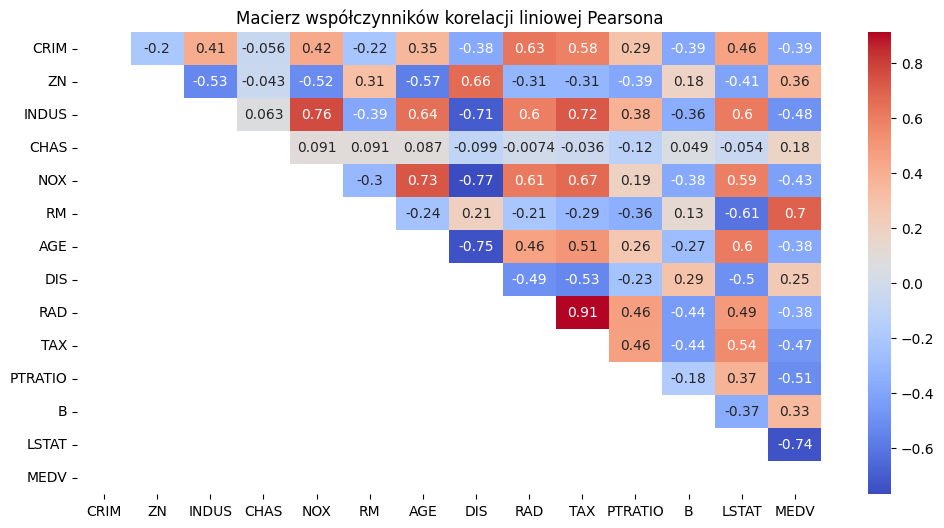

In [8]:
fig, ax = plt.subplots(figsize=(12,6), facecolor='white')

sns.heatmap(data=corr_matrix_pearson, mask=np.tril(corr_matrix_pearson), ax=ax, cmap='coolwarm', annot=True)
ax.set_title('Macierz współczynników korelacji liniowej Pearsona')


plt.show()

***DODATNIA***

 - **0.91** **RAD** i **TAX** - odległość od autostrad i podatek

 - **0.76** **INDUS** i **NOX** - % powierzchni przemysłowej i ilośc NOx

 - **0.73** **NOX** i **AGE** - ilość NOx i % wybudowanych przed 1940

 - **0.72** **INDUS** i **TAX** - % powierzchni przemysłowej i podatek

 - **0.70** **RM** i **MEDV** - średnia liczba pokoi i mediana wartości domu

***UJEMNA***

 - **0.77** **NOX** i **DIS** - ilośc NOx i odległośc od 5 największych centów zatrudnienia

 - **0.75** **AGE** i **DIS** - % wybudowanych przed 1940 i odległośc od 5 największych centów zatrudnienia

 - **0.74** **LSTAT** i **MEDV** - % biedy i mediana wartości domu

 - **0.71** **INDUS** i **DIS** - % powierzchni przemysłowej i odległośc od 5 największych centów zatrudnienia


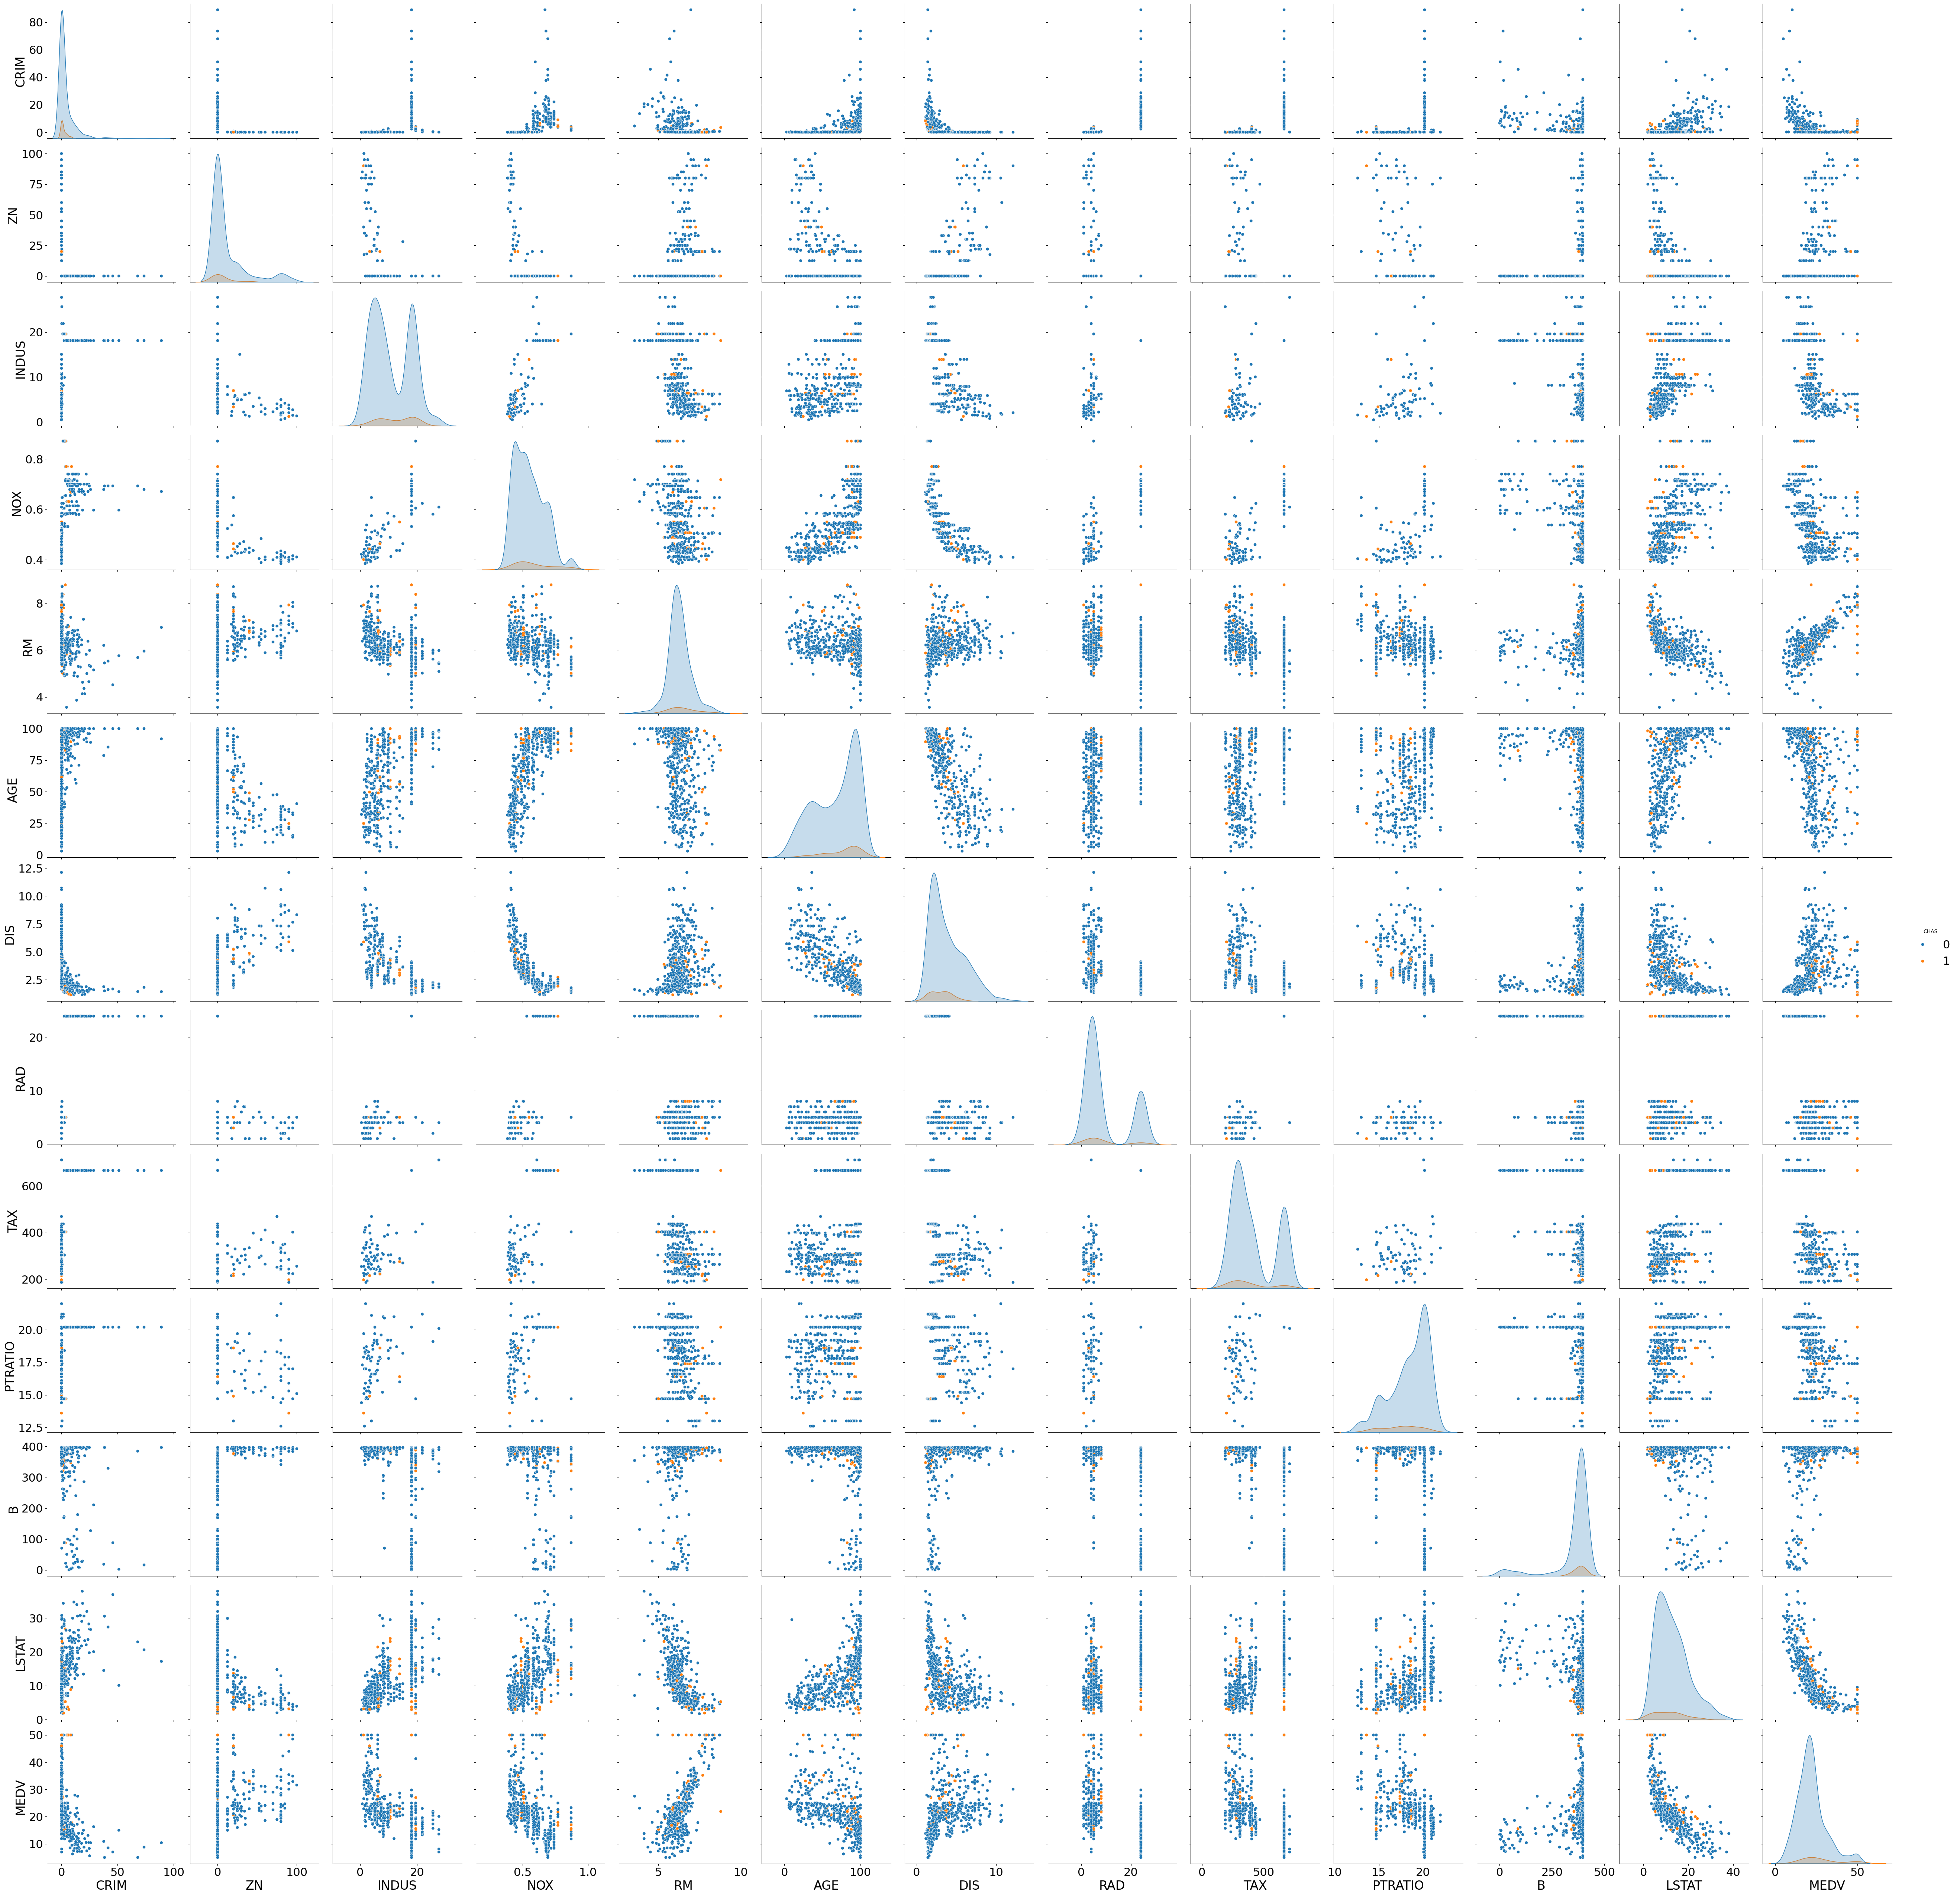

In [9]:
plt.rcParams.update({'axes.labelsize': 24,
                     'xtick.labelsize': 22,
                     'ytick.labelsize': 22,
                     'legend.fontsize': 22})

sns.pairplot(data, hue='CHAS', height=4, aspect=1)
plt.show()

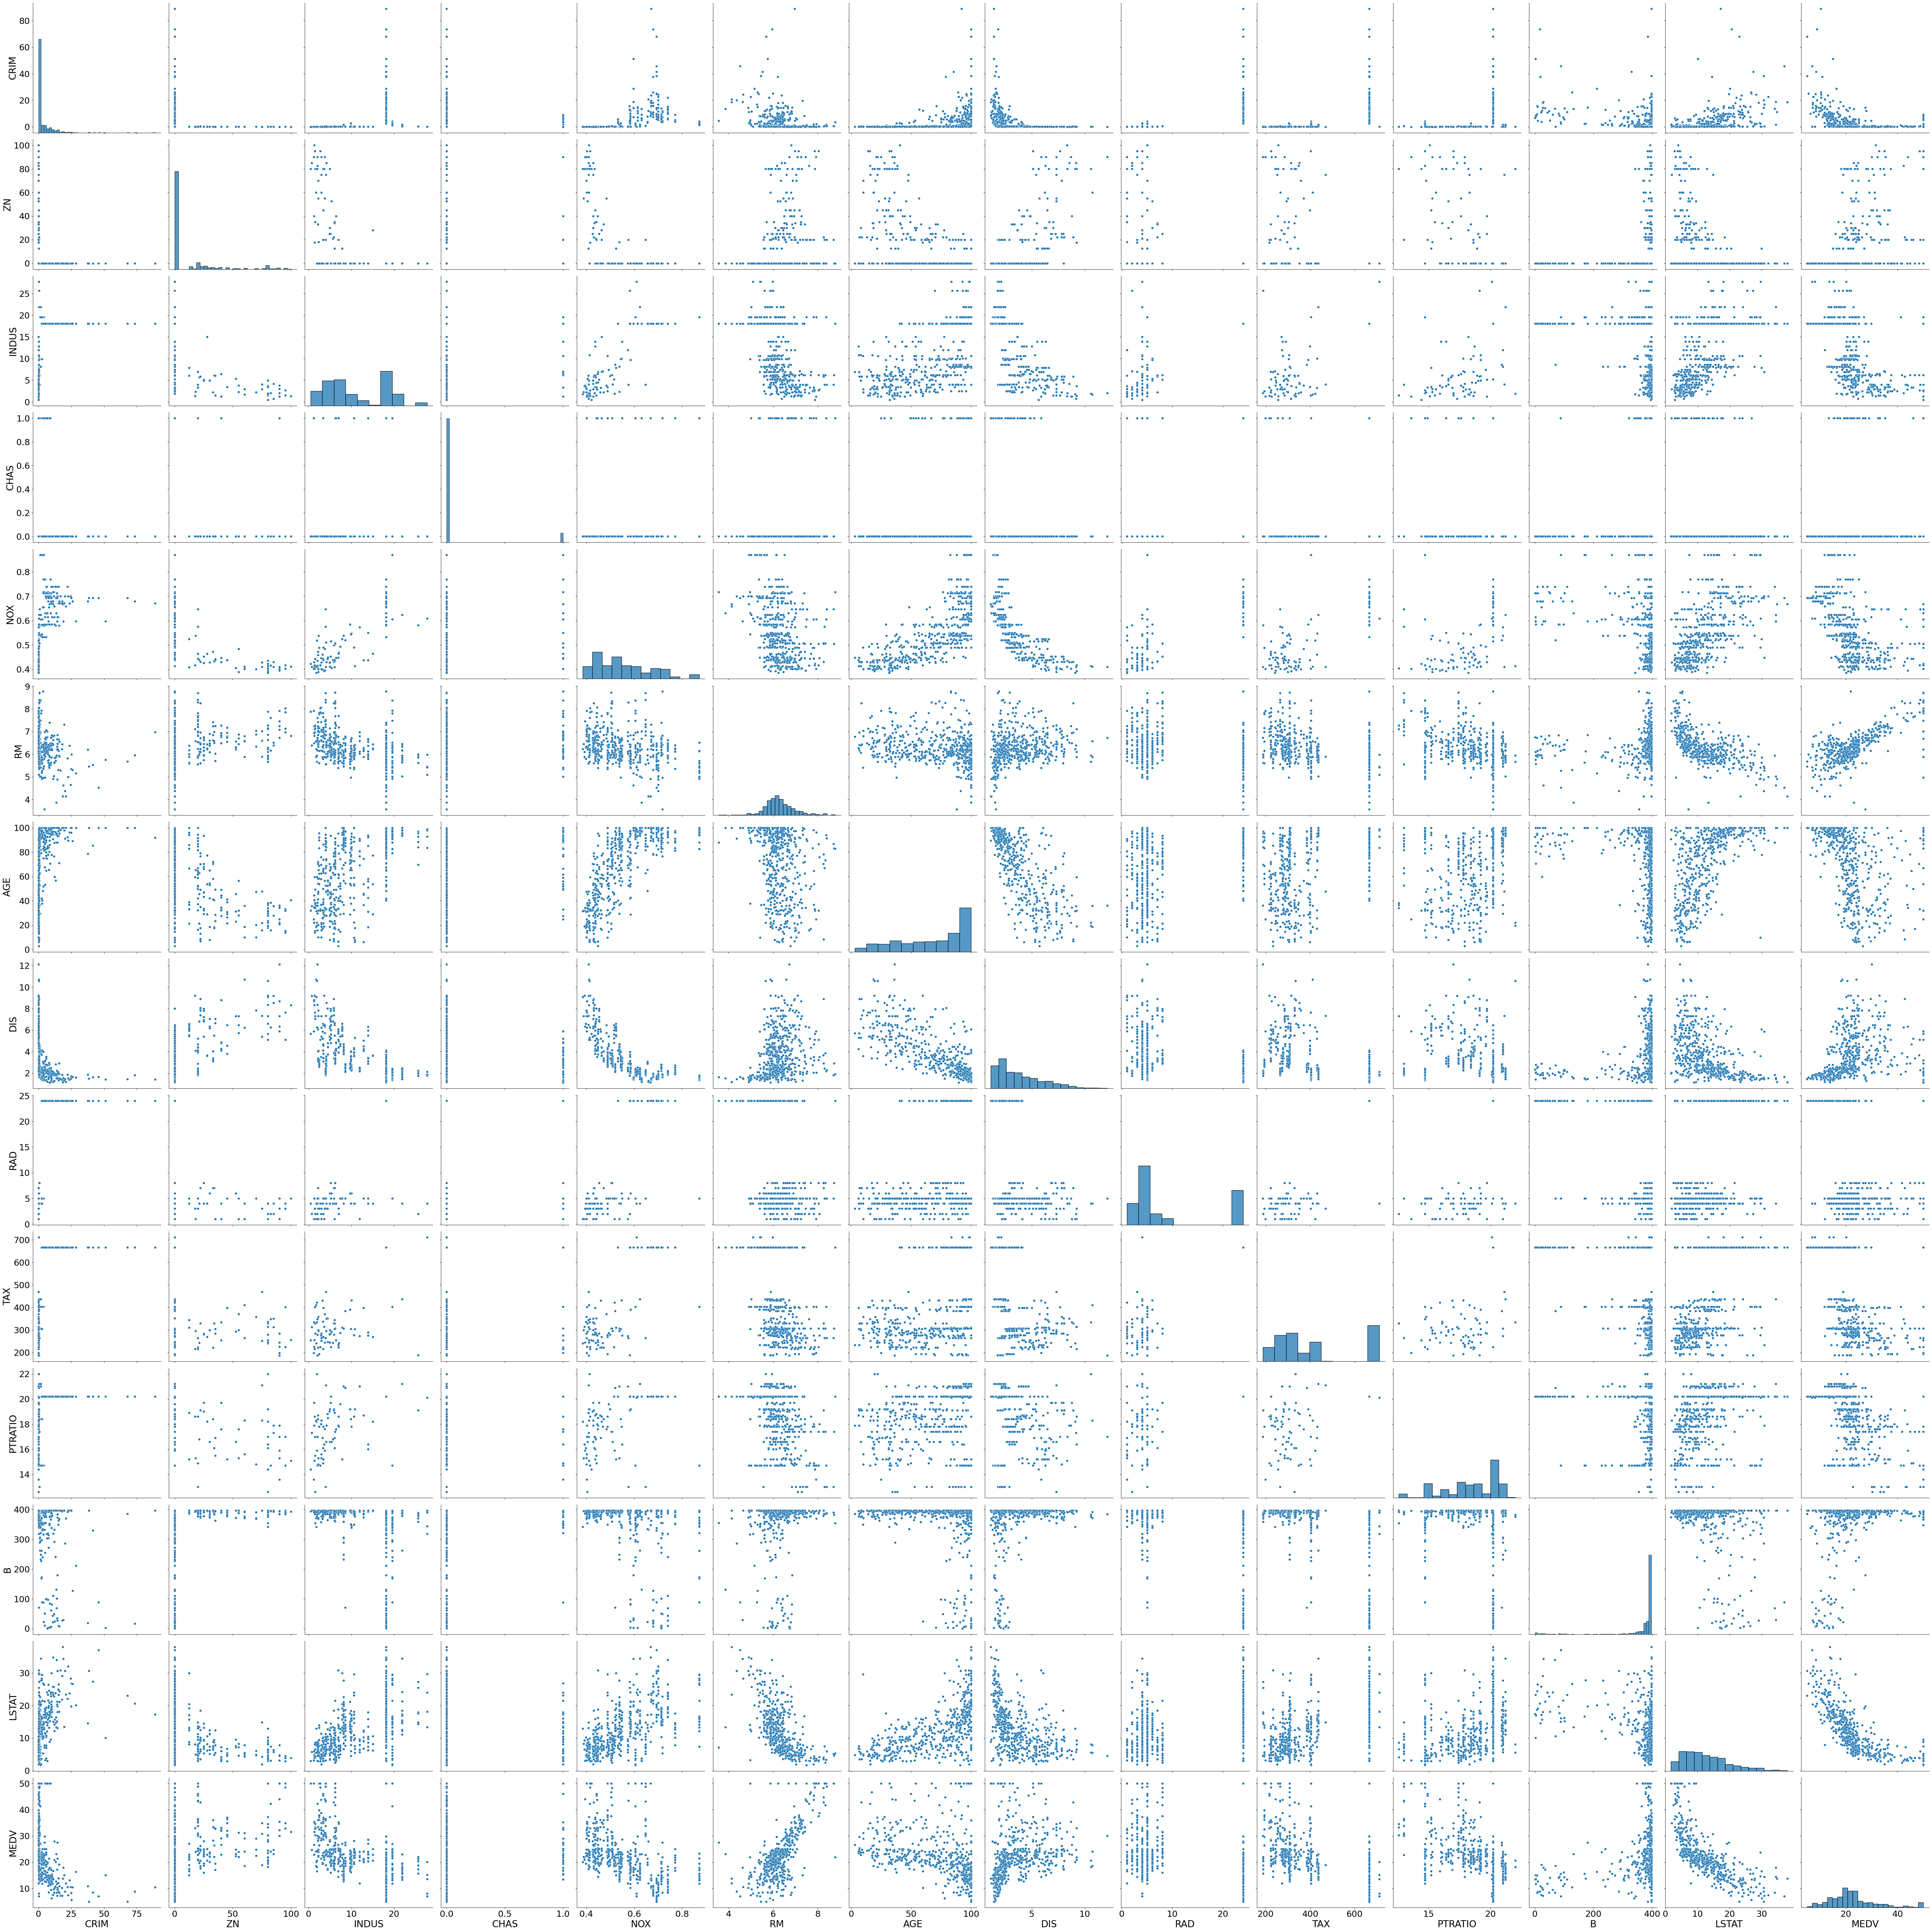

In [10]:
sns.pairplot(data, height=5, aspect=1)
plt.show()

***LINIOWOŚĆ WIDAĆ W***
 - **INDUS** i **NOX**
 - **NOX** i **AGE**
 - **NOX** i **DIS**
 - **RM** i **LSTAT** bardziej funkcja kwadratowa
 - **RM** i **MEDV**
 - **DIS** i **AGE**
 - **DIS** i **NOX** bardziej funkcja kwadratowa
 - **LSTAT** i **NOX**
 - **LSTAT** i **MEDV** chociaż bardziej funckja kwadratowa

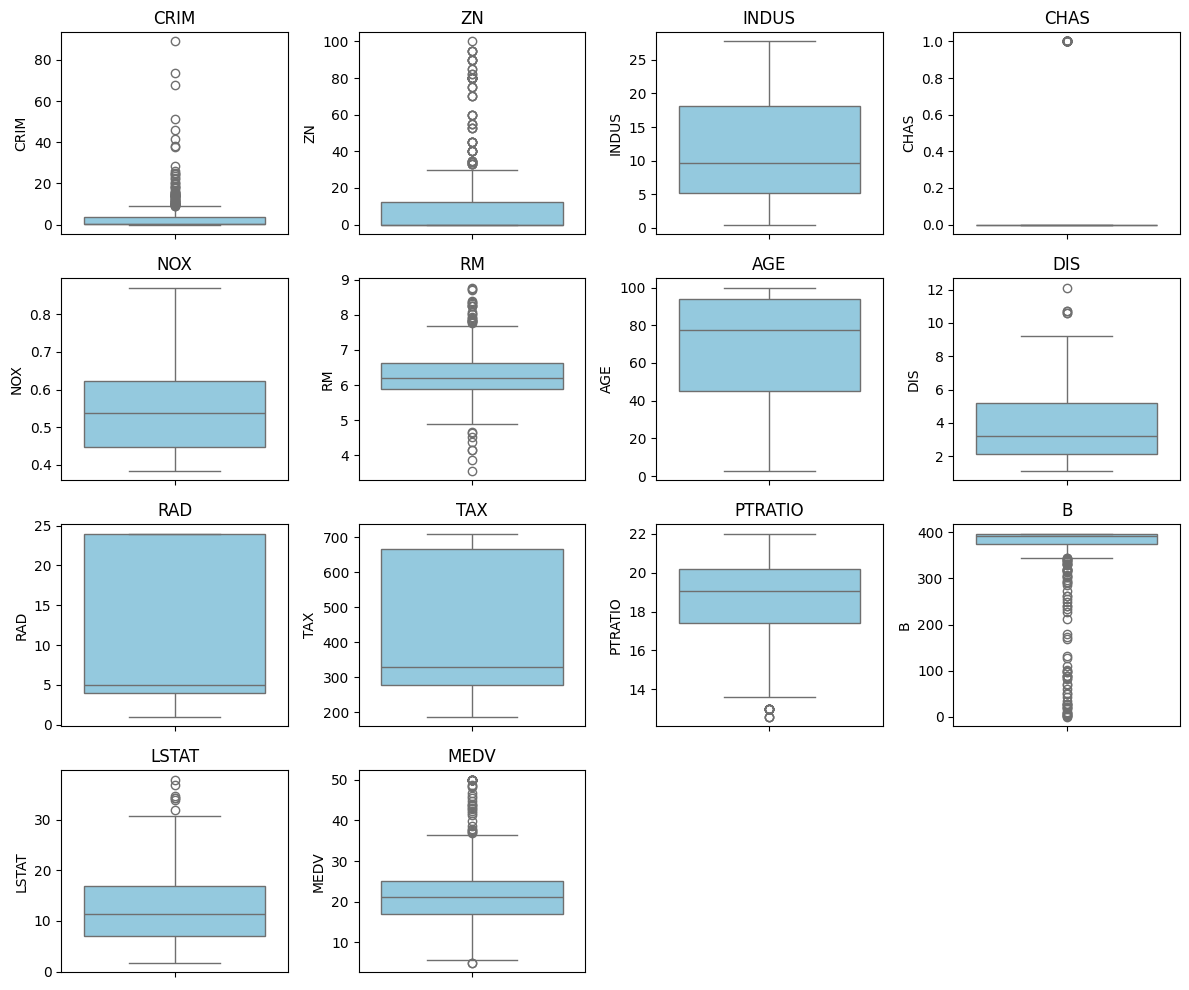

In [11]:
plt.figure(figsize=(12,10))
plt.rcdefaults() 
for i, col in enumerate(names, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [12]:
X = data.drop('MEDV', axis = 1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
lin_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

lin_pipe.fit(X_train, y_train)
lin_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [14]:
lin_pred = lin_pipe.predict(X_test)
residuals = y_test - lin_pred

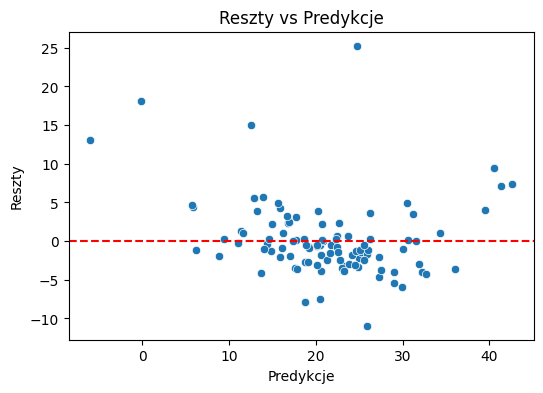

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=lin_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predykcje")
plt.ylabel("Reszty")
plt.title("Reszty vs Predykcje")
plt.show()

In [16]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)

print("LM stat:", bp_test[0], "p-value:", bp_test[1])

LM stat: 59.18908669091026 p-value: 7.332519419034737e-08


# Test Breuscha–Pagana – homoskedastyczność reszt (jest stała wariancja reszt)

- **Cel:** sprawdzić, czy wariancja reszt regresji liniowej jest stała.  
- **H0:** wariancja stała (homoskedastyczność)  
- **H1:** wariancja zmienna (heteroskedastyczność)  


| Statystyka | p-value |
|------------|---------|
| 59.19      | 7.33e-08 |

p-value << 0.05 → odrzucamy H0 → reszty nie mają stałej wariancji (heteroskedastyczność).  


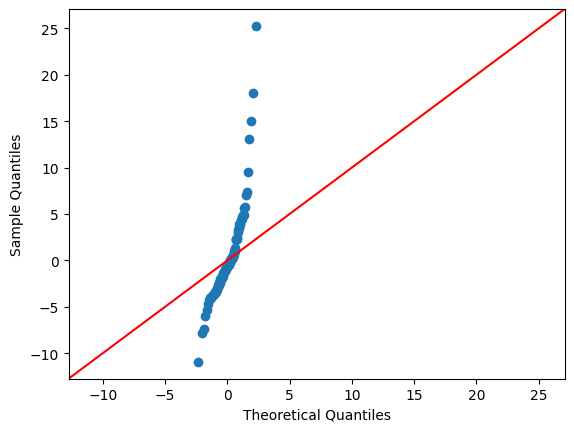

Shapiro stat: 0.8313881387585852 p-value: 1.990690686513643e-09


In [17]:
sm.qqplot(residuals, line='45')
plt.show()

shapiro_test = stats.shapiro(residuals)
print("Shapiro stat:", shapiro_test.statistic, "p-value:", shapiro_test.pvalue)

Bardzo niskie p-value, reszty nie są normalne (widać na wykresie)

In [18]:
dw = durbin_watson(residuals)
print("Durbin-Watson:", dw)

Durbin-Watson: 1.5424192894659496


| DW | Interpretacja |
|----|---------------|
| ≈ 2 | brak autokorelacji |
| < 2 | autokorelacja dodatnia |
| > 2 | autokorelacja ujemna |
| ~ 0 | silna autokorelacja dodatnia |
| ~ 4 | silna autokorelacja ujemna |

Słaba pozytywna autokorelacja reszt

In [19]:
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) 
                   for i in range(X_train_const.shape[1])]

vif_data

feature         VIF
0     const  580.747263
1      CRIM    1.713187
2        ZN    2.465631
3     INDUS    3.877855
4      CHAS    1.096674
5       NOX    4.469150
6        RM    1.947809
7       AGE    2.989948
8       DIS    4.168578
9       RAD    7.658316
10      TAX    8.943301
11  PTRATIO    1.851448
12        B    1.325121
13    LSTAT    2.818045

VIF = współczynnik inflacji wariancji  
**Inflacja wariancji** – wzrost niepewności estymatorów β wskutek współliniowości zmiennych X.

- VIF ≈ 1 → brak problemu  
- VIF > 5 → możliwy problem  
- VIF > 10 → poważny problem

In [20]:
xgb_pipe = Pipeline([
    ('model', xgb.XGBRegressor(
        objective='reg:squarederror',
        colsample_bytree=0.3,
        random_state=42
    ))
])
xgb_pipe

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.3, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [21]:
param_grid = {
    'model__learning_rate': [0.05, 0.1, 0.3],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [50, 100, 200]
}
grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=0.3,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     feature_weights=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     inte...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             param_grid={'model__learning_rate': [0.05, 0.1, 0.3],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [22]:
print("Best score:", grid.best_score_)
print("Best params:", grid.best_params_)

Best score: -13.49488879570664
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}


In [23]:
xgb_pred = grid.best_estimator_.predict(X_test)

metrics = {
    'R2': [r2_score(y_test, lin_pred), r2_score(y_test, xgb_pred)],
    'MAE': [mean_absolute_error(y_test, lin_pred), mean_absolute_error(y_test, xgb_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lin_pred)), np.sqrt(mean_squared_error(y_test, xgb_pred))]
}
pd.DataFrame(metrics, index=['LinearRegression', 'XGBoost']).T

LinearRegression   XGBoost
R2            0.668759  0.874336
MAE           3.189092  2.061753
RMSE          4.928602  3.035689